You would need to do eda, scoring model, docker, streamlit and full github documentation

Note to myslef:
*   ydata Profile
*   TPOT
*   H2O AutoML


'NM' in Payment_of_Min_Amount

I believe the Num_of_Delayed_Payment feature tells you that Person X had to pay for Y but did not. And if the person X failed to pay Y a number of n times then n is the Num_of_Delayed_Payment

DATA OVERVIEW

'id': A unique identifier for each data record.

'customer_id': An identifier for each customer, allowing you to associate multiple records with the same individual.

'month': The month of the data record, indicating when the data was collected or relevant.

'name': The name of the customer, which may be used for identification purposes.

'age': The age of the customer, providing information about their age demographic.

'ssn': The Social Security Number (SSN) of the customer, a unique identifier used for verification.

'occupation': The occupation or profession of the customer, which can help understand their employment status.

'annual_income': The annual income of the customer, a crucial financial parameter.

'monthly_inhand_salary': The monthly salary or income available to the customer after deductions.

'num_bank_accounts': The number of bank accounts held by the customer, indicating their banking activity.

'num_credit_card': The number of credit cards held by the customer, reflecting their credit usage.

'interest_rate': The interest rate associated with the customer's financial products, such as loans or credit cards.

'num_of_loan': The number of loans the customer has, providing insight into their debt obligations.

'type_of_loan': The types of loans the customer holds, which can include mortgages, personal loans, etc.

'delay_from_due_date': The delay in payment from the due date for loans or credit cards, indicating their payment behavior.

'num_of_delayed_payment': The number of delayed payments made by the customer.

'changed_credit_limit': Changes in the customer's credit limit, which can affect their credit utilization.

'num_credit_inquiries': The number of credit inquiries made by the customer, potentially affecting their credit score.

'credit_mix': The composition of the customer's credit accounts, which can impact their credit profile.

'outstanding_debt': The amount of outstanding debt owed by the customer.

'credit_utilization_ratio': The ratio of credit used to the total available credit, a key factor in credit scoring.

'credit_history_age': The age of the customer's credit history, influencing their creditworthiness.

'payment_of_min_amount': How customers handle the minimum payment amount on credit cards or loans.

'total_emi_per_month': The total Equated Monthly Installment (EMI) payments made by the customer.

'amount_invested_monthly': The amount the customer invests on a monthly basis, if applicable.

'payment_behaviour': The behavior of the customer regarding their payments, reflecting their financial responsibility.

'monthly_balance': The monthly balance in the customer's financial accounts.

'credit_score': The target variable representing the customer's credit score, which we aim to predict.


In [5]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("parisrohan/credit-score-classification")

# print("Path to dataset files:", path)

In [7]:
# profile = ProfileReport(train_df, title="My Data Profile Report")
# profile.to_notebook_iframe()

In [8]:
train_path = "../data/train.csv"
# test_path = "./test.csv"

train_df = pd.read_csv(train_path)
# test_df = pd.read_csv(test_path)

In [9]:
train_df.columns = train_df.columns.str.lower()

In [16]:
train_df.iloc[0]['type_of_loan']

'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'

In [4]:
train_df['payment_behaviour'].value_counts()

payment_behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [226]:
# train_df.head(10)

# Data Cleaning

Columns to drop:


*   id
*   customer_id --> repetitive value
*   name --> repetitive value
*   ssn --> informal feature only

may be

* month --> assume each month(raw) evaluated sperately
* type_of_Loan --> repetitive value



In [227]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      90015 non-null   object 
 4   age                       100000 non-null  object 
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  object 
 8   monthly_inhand_salary     84998 non-null   float64
 9   num_bank_accounts         100000 non-null  int64  
 10  num_credit_card           100000 non-null  int64  
 11  interest_rate             100000 non-null  int64  
 12  num_of_loan               100000 non-null  object 
 13  type_of_loan              88592 non-null   ob

In [228]:
train_df.isnull().sum()

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

## General Operations

Replance all random and na values with np.nan to ensure consistency when perform another operations. Also fix data type for numeric columns.

In [229]:
col_to_drop = ['id', 'name', 'ssn']
train_df_new = train_df.drop(col_to_drop, axis=1)
# More comprehensive cleaning
# Deleting specific strange values
mapping = {'__-333333333333333333333333333__':np.nan,'__10000__':np.nan}
train_df_new.replace(mapping, inplace=True)

invalid_patterns = ['', 'nan', '!@9#%8', '#F%$D@*&8', 'NM', 'nm']
train_df_new = train_df_new.applymap(lambda x: x if x is np.nan or not isinstance(
    x, str) else str(x).strip('_')).replace(invalid_patterns, np.nan)

train_df_new['age'] = train_df_new['age'].astype(int)
train_df_new['annual_income'] = train_df_new['annual_income'].astype(float)
train_df_new['num_of_loan'] = train_df_new['num_of_loan'].astype(int)
train_df_new['num_of_delayed_payment'] = train_df_new['num_of_delayed_payment'].astype(
    float)
train_df_new['changed_credit_limit'] = train_df_new['changed_credit_limit'].astype(
    float)
train_df_new['outstanding_debt'] = train_df_new['outstanding_debt'].astype(
    float)
train_df_new['amount_invested_monthly'] = train_df_new['amount_invested_monthly'].astype(
    float)
train_df_new['monthly_balance'] = train_df_new['monthly_balance'].astype(float)

For the other columns which data type is object. I make sure they have the same format also.

In [230]:
string_columns = list(
    train_df_new.dtypes[train_df_new.dtypes == 'object'].index)

for col in string_columns:
    train_df_new[col] = train_df_new[col].str.lower().str.replace(' ', '_')

I notice some entries in occupation column have na value so I replace them by grouping them by customer_id and fill them with backward of forward value

In [231]:
# Fill within customer groups first
train_df_new['occupation'] = train_df_new.groupby(
    'customer_id')['occupation'].fillna(method='ffill')
train_df_new['occupation'] = train_df_new.groupby(
    'customer_id')['occupation'].fillna(method='bfill')

## Fixing age missing values

Searching in Age column I found that youngest age is 14 working as developer and the oldest customer are around 50 so I set the limit to 60

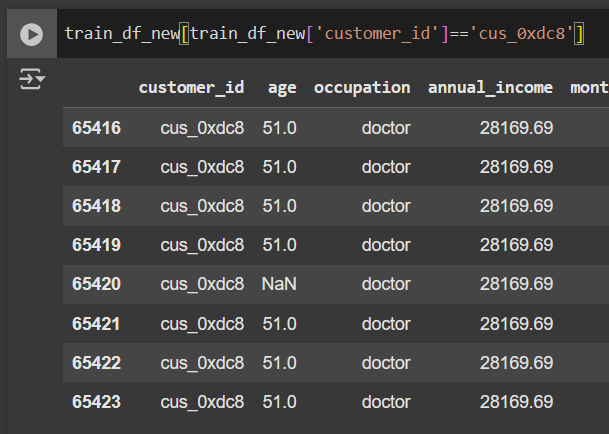

In [232]:
# Set unreasonable ages to NaN -- youngest age is 14 working as developer -- old customer are around 50 to 60
train_df_new.loc[(train_df_new['age'] < 14) | (
    train_df_new['age'] > 60), 'age'] = np.nan

# Fill within customer groups
train_df_new['age'] = train_df_new.groupby(
    'customer_id')['age'].fillna(method='ffill').fillna(method='bfill')

## Fixing credit_history_age

Transformation happened here is happened --> (year * 12) + month

Then for na and nan values I group by them and loop over the group to try fill it correctly (increment or decrement)

In [233]:
def year_month(x):
    if pd.isna(x) or str(x).lower() == 'na':
        return np.nan

    # Clean the string and split by 'and'
    parts = str(x).replace('_', ' ').split(' and ')

    # Extract years and months
    years = int(parts[0].split(' ')[0]) * 12  # first number before 'years'
    months = int(parts[1].split(' ')[0])     # first number before 'months'

    return years + months


train_df_new['credit_history_age'] = train_df_new['credit_history_age'].replace({
                                                                                'na': np.nan})
train_df_new['credit_history_age'] = train_df_new['credit_history_age'].apply(
    year_month)

In [234]:
def fill_credit_history_sequential(group):
    """Fill missing credit history values considering monthly progression"""
    group = group.copy()

    # Sort by month order (assuming you have month info or can infer sequence)
    # For now, assuming the data is already in chronological order

    # Forward fill then add progression
    for i in range(1, len(group)):
        if pd.isna(group.iloc[i]) and not pd.isna(group.iloc[i-1]):
            group.iloc[i] = group.iloc[i-1] + 1

    # Backward fill then subtract progression
    for i in range(len(group)-2, -1, -1):
        if pd.isna(group.iloc[i]) and not pd.isna(group.iloc[i+1]):
            group.iloc[i] = group.iloc[i+1] - 1

    return group


# Apply the sequential filling
train_df_new['credit_history_age'] = train_df_new.groupby('customer_id')['credit_history_age'].apply(
    fill_credit_history_sequential).reset_index(level=0, drop=True)

In [235]:
train_df_new['monthly_inhand_salary'] = train_df_new.groupby(
    'customer_id')['monthly_inhand_salary'].fillna(method='ffill').fillna(method='bfill')
train_df_new['credit_mix'] = train_df_new.groupby(
    'customer_id')['credit_mix'].fillna(method='bfill').fillna(method='ffill')
train_df_new['payment_of_min_amount'] = train_df_new.groupby(
    'customer_id')['payment_of_min_amount'].transform(lambda x: x.mode()[0])
train_df_new['payment_behaviour'] = train_df_new.groupby('customer_id')['payment_behaviour'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))
train_df_new['num_of_delayed_payment'] = train_df_new.groupby(
    'customer_id')['num_of_delayed_payment'].transform(lambda x: x.median() if not x.isnull().all() else pd.NA)
train_df_new['changed_credit_limit'] = train_df_new.groupby(
    'customer_id')['changed_credit_limit'].transform(lambda x: x.median() if not x.isnull().all() else pd.NA)

mean_imputation = ['monthly_balance', 'amount_invested_monthly']
for col in mean_imputation:
    train_df_new[col] = train_df_new.groupby(
        'customer_id')[col].transform(lambda x: x.fillna(x.mean()))

median_imputation = ['num_of_loan','num_credit_inquiries',
    'num_bank_accounts',
    'total_emi_per_month']
for column in median_imputation:
    train_df_new[column] = train_df_new.groupby('customer_id')[column].transform(lambda x: x.median(
    ) if not x.isnull().all() else np.nan)    # Replacing zeros with np.nan then implementing mean imputation.
    train_df_new[column] = train_df_new[column].replace(0, np.nan)
    train_df_new[column].fillna(train_df_new[column].median(), inplace=True)
    train_df_new[column] = train_df_new[column].astype(int)

## Encoding

In [236]:
loan_type_split = train_df_new['type_of_loan'].str.split(
    r', and |, | and |,').dropna()
loan_types_list = [item.removeprefix('_and_').strip(
    '_') for sublist in loan_type_split.tolist() for item in sublist]
unique_loan_types = set(loan_types_list)

for loan_type in unique_loan_types:
    if pd.notna(loan_type):

        train_df_new[f'has_{loan_type}'] = train_df_new['type_of_loan'].apply(
            lambda x: loan_type in x if pd.notna(x) else pd.NA)
        train_df_new[f'has_{loan_type}'] = train_df_new[f'has_{loan_type}'].apply(
            lambda x: int(x) if x is not pd.NA else x)

        mode_value = train_df_new[f'has_{loan_type}'].mode().iloc[0]
        train_df_new[f'has_{loan_type}'].fillna(mode_value, inplace=True)

In [237]:
# Encoding without first value
month_dummies = pd.get_dummies(
    train_df_new['month'], prefix='month', drop_first=True, dtype=int)
train_df_new = pd.concat([train_df_new, month_dummies], axis=1)

occupation_dummies = pd.get_dummies(
    train_df_new['occupation'], drop_first=True, prefix='occupation', dtype=int)
train_df_new = pd.concat([train_df_new, occupation_dummies], axis=1)

credit_mix_dummies = pd.get_dummies(
    train_df_new['credit_mix'], drop_first=True, prefix='credit_mix', dtype=int)
train_df_new = pd.concat([train_df_new, credit_mix_dummies], axis=1)

payment_of_min_amount_dummies = pd.get_dummies(
    train_df_new['payment_of_min_amount'], drop_first=True, prefix='payment_of_min_amount', dtype=int)
train_df_new = pd.concat([train_df_new, payment_of_min_amount_dummies], axis=1)

payment_behaviour_dummies = pd.get_dummies(
    train_df_new['payment_behaviour'], drop_first=True, dtype=int)
train_df_new = pd.concat([train_df_new, payment_behaviour_dummies], axis=1)

# Poor==0, Good==1, Standard==2
mapping = {"standard": 2, "poor": 0, "good": 1}
train_df_new['credit_score'] = train_df_new['credit_score'].replace(mapping)

In [238]:
train_df_new['payment_of_min_amount'].value_counts()

payment_of_min_amount
yes    59432
no     40568
Name: count, dtype: int64

In [239]:
# train_df_new.drop('type_of_loan', axis=1, inplace=True)
# train_df_new.drop('month', axis=1, inplace=True)
# train_df_new.drop('occupation', axis=1, inplace=True)
# train_df_new.drop('credit_mix', axis=1, inplace=True)
# train_df_new.drop('payment_of_min_amount', axis=1, inplace=True)
# train_df_new.drop('payment_behaviour', axis=1, inplace=True)
# train_df_new.drop('customer_id', axis=1, inplace=True)

In [240]:
train_df_new.columns

Index(['customer_id', 'month', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'type_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score', 'has_not_specified', 'has_credit-builder_loan',
       'has_student_loan', 'has_mortgage_loan', 'has_debt_consolidation_loan',
       'has_auto_loan', 'has_payday_loan', 'has_personal_loan',
       'has_home_equity_loan', 'month_august', 'month_february',
       'month_january', 'month_july', 'month_june', 'month_march', 'month_may',
       'occupation_architect', 'occupation_developer', 'occupation_doctor',
       'occupation_engineer', 'occupat

In [241]:
integer_columns = ['age',
                   'num_bank_accounts',
                   'num_credit_card',
                   'interest_rate',
                   'num_of_loan',
                   'delay_from_due_date',
                   'num_of_delayed_payment',
                   'num_credit_inquiries',
                   'credit_history_age']

float_columns = ['credit_utilization_ratio',
                 'annual_income',
                 'monthly_inhand_salary',
                 'changed_credit_limit',
                 'outstanding_debt',
                 'total_emi_per_month',
                 'amount_invested_monthly',
                 'monthly_balance']

numerical_columns = integer_columns + float_columns

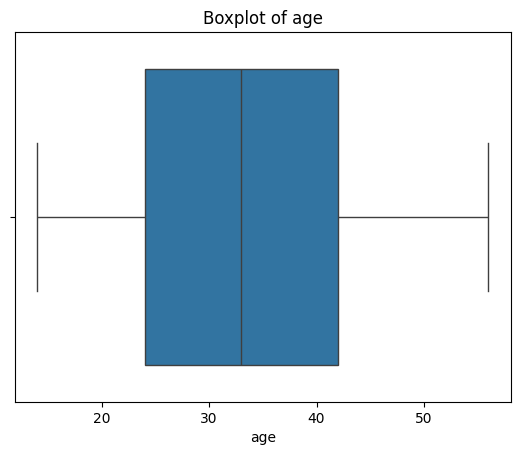

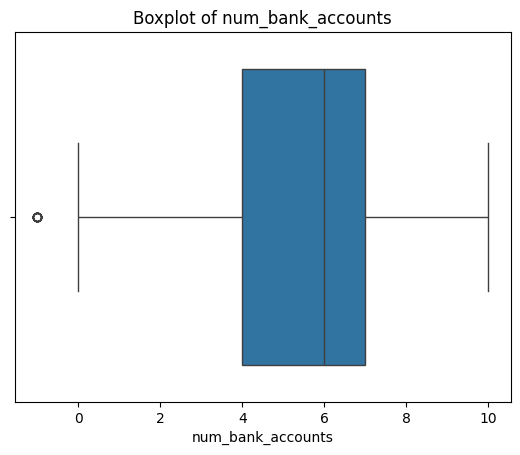

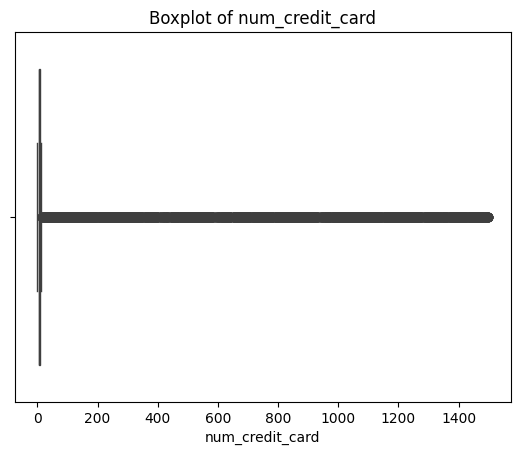

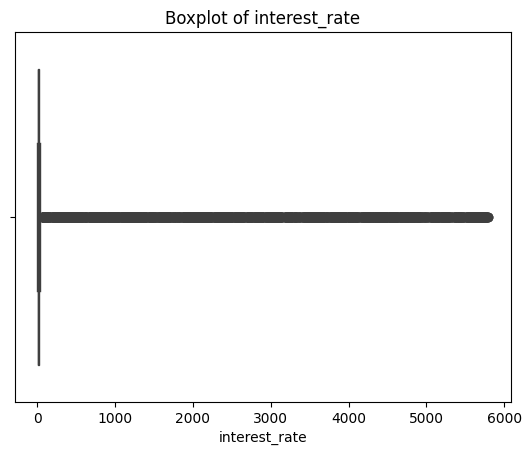

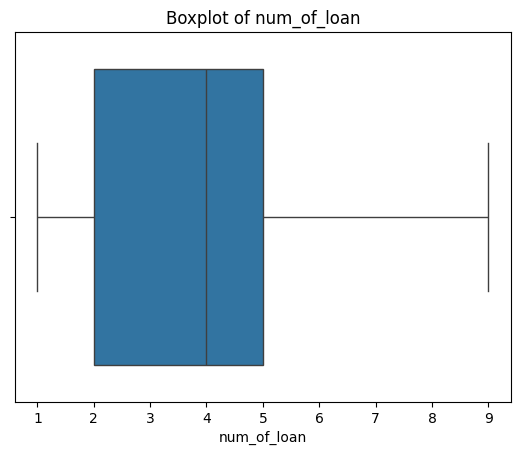

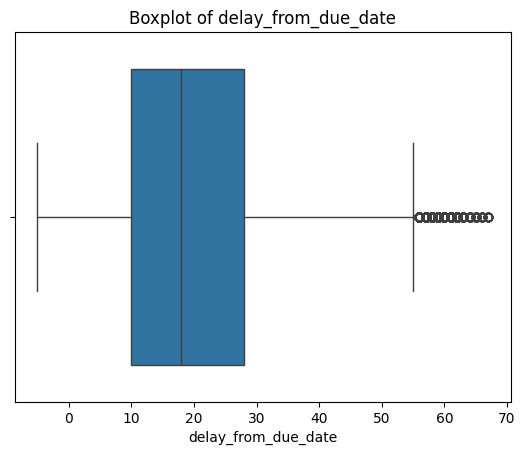

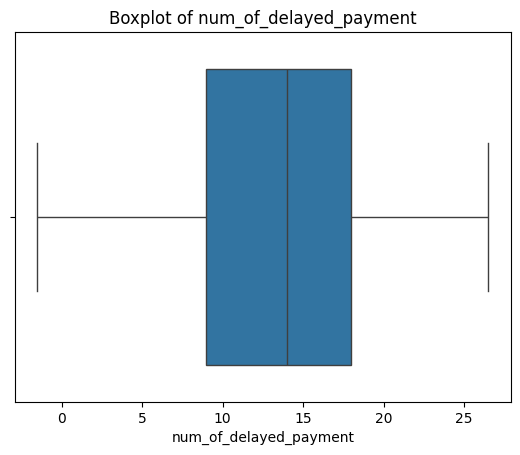

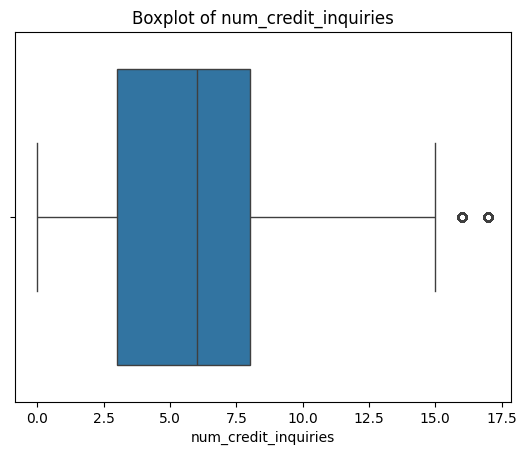

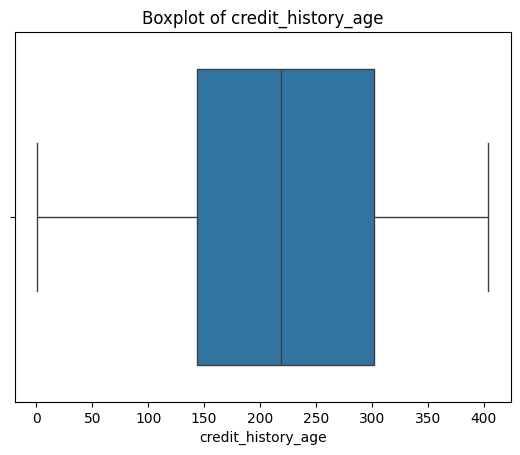

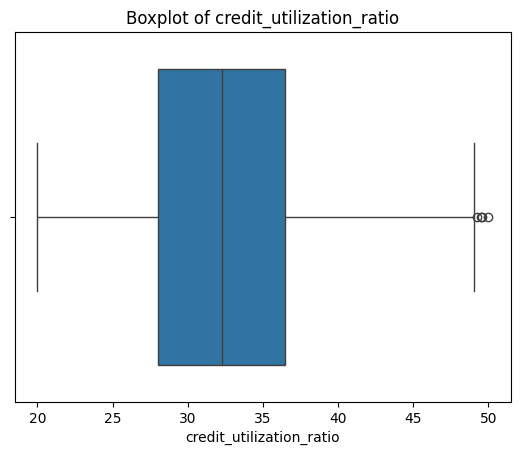

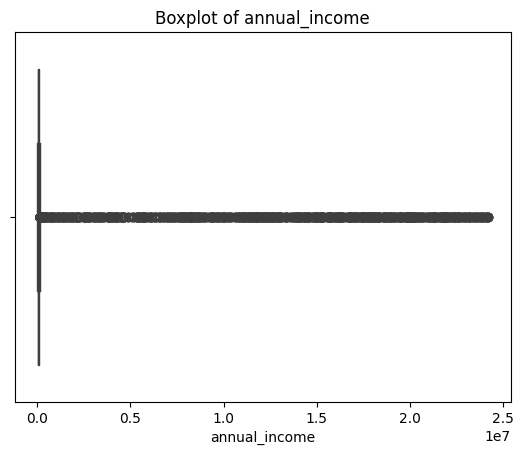

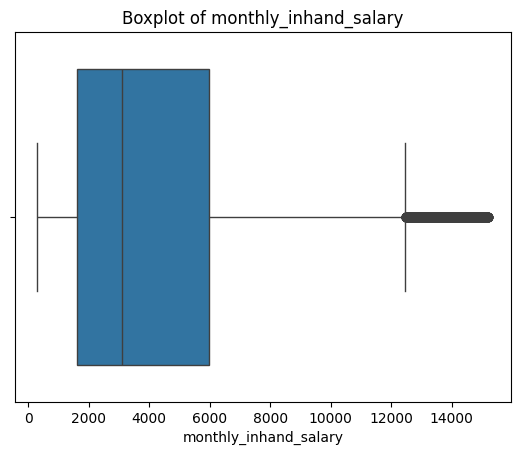

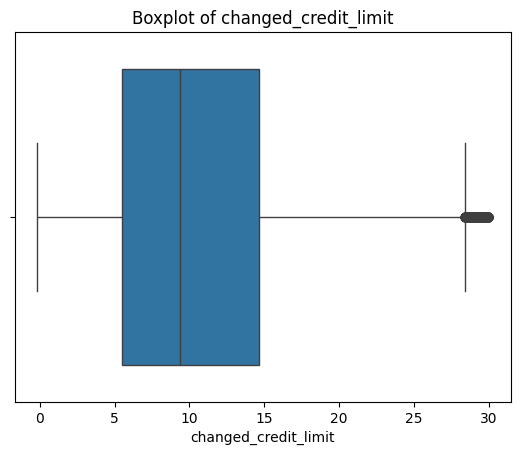

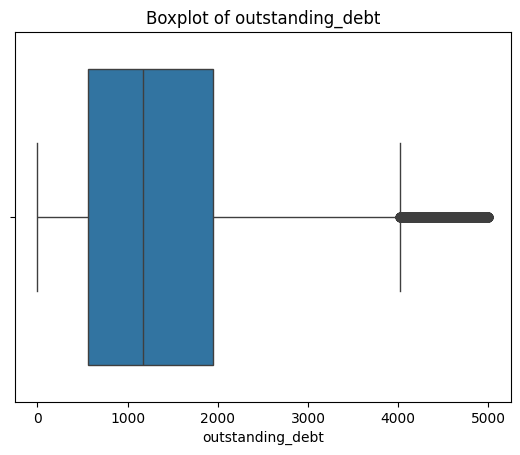

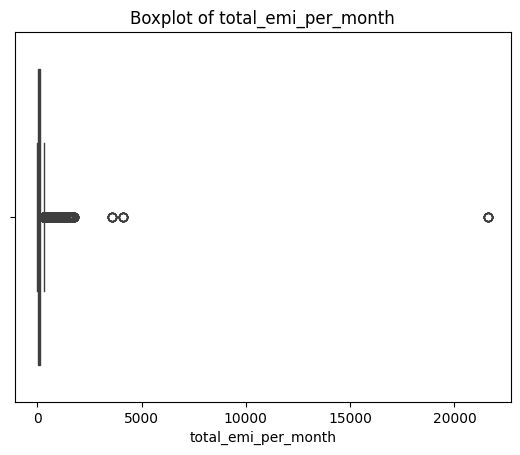

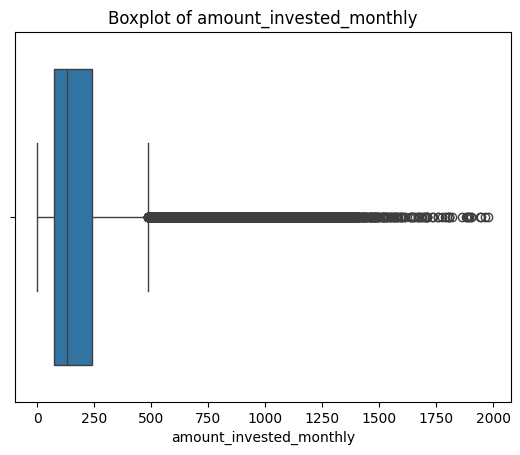

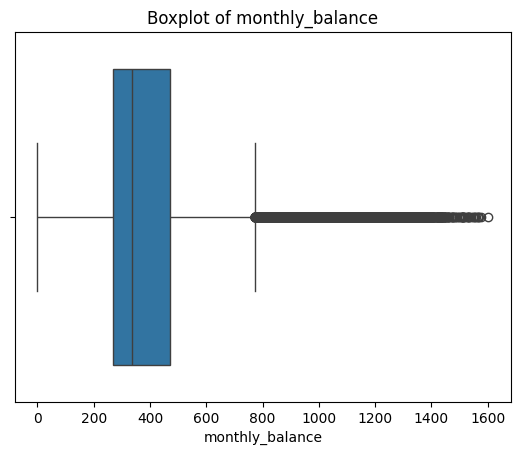

In [242]:
for col in numerical_columns:
    sns.boxplot(x=train_df_new[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

11.5
Number of Outliers in num_credit_card: 2271


Text(0.5, 1.0, 'Boxplot of num_credit_card')

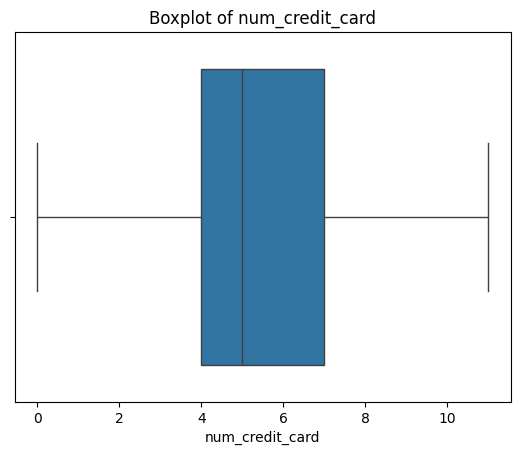

In [243]:
q1 = train_df_new['num_credit_card'].quantile(0.25)
q3 = train_df_new['num_credit_card'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(upper_bound)
num_credit_card_outliers = train_df_new[train_df_new['num_credit_card'] > upper_bound]['num_credit_card'].count()
print(f'Number of Outliers in num_credit_card: {num_credit_card_outliers}')
# remove outliers and replace them with mode by grouping by customer_id
train_df_new.loc[train_df_new['num_credit_card'] > upper_bound, 'num_credit_card'] = train_df_new.groupby('customer_id')['num_credit_card'].transform(lambda x: x.mode()[0])
sns.boxplot(x=train_df_new['num_credit_card'])
plt.title(f'Boxplot of num_credit_card')

38.0
Number of Outliers in interest_rate: 2034


Text(0.5, 1.0, 'Boxplot of interest_rate')

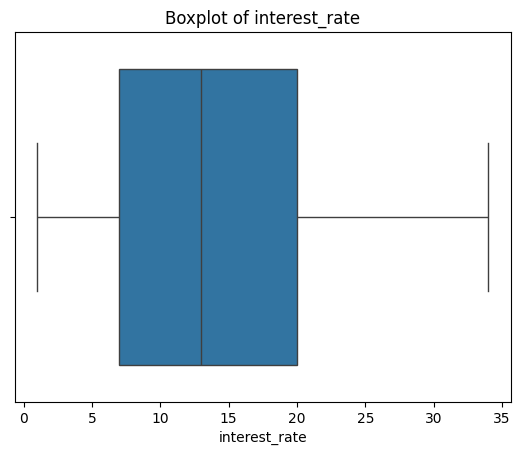

In [244]:
q1 = train_df_new['interest_rate'].quantile(0.25)
q3 = train_df_new['interest_rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(upper_bound)
interest_rate_outliers = train_df_new[train_df_new['interest_rate'] > upper_bound]['interest_rate'].count()
print(f'Number of Outliers in interest_rate: {interest_rate_outliers}')
# remove outliers and replace them with mode by grouping by customer_id
train_df_new.loc[train_df_new['interest_rate'] > upper_bound, 'interest_rate'] = train_df_new.groupby('customer_id')['interest_rate'].transform(lambda x: x.mode()[0])
sns.boxplot(x=train_df_new['interest_rate'])
plt.title(f'Boxplot of interest_rate')

-0.5
Number of Outliers in num_bank_accounts: 16


Text(0.5, 1.0, 'Boxplot of num_bank_accounts')

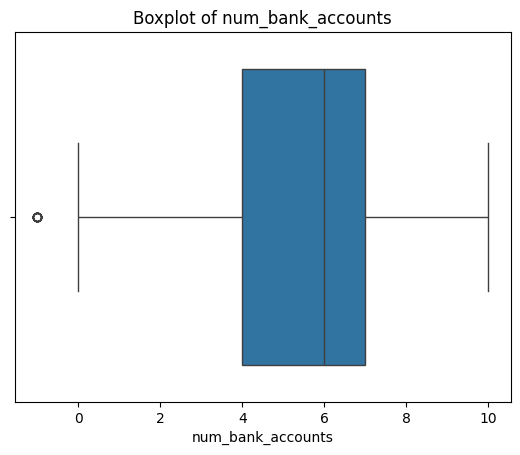

In [245]:
q1 = train_df_new['num_bank_accounts'].quantile(0.25)
q3 = train_df_new['num_bank_accounts'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
num_bank_accounts_outliers = train_df_new[train_df_new['num_bank_accounts'] < lower_bound]['num_bank_accounts'].count()
print(f'Number of Outliers in num_bank_accounts: {num_bank_accounts_outliers}')
sns.boxplot(x=train_df_new['num_bank_accounts'])
plt.title(f'Boxplot of num_bank_accounts')

Text(0.5, 1.0, 'Boxplot of num_credit_inquiries')

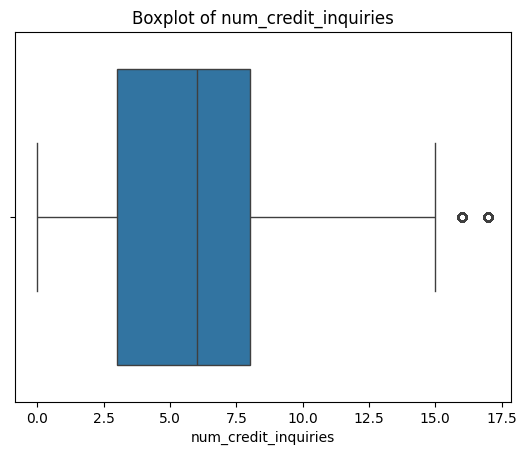

In [253]:
sns.boxplot(x=train_df_new['num_credit_inquiries'])
plt.title(f'Boxplot of num_credit_inquiries')

15.5
Number of Outliers in num_credit_inquiries: 696


Text(0.5, 1.0, 'Boxplot of num_credit_inquiries')

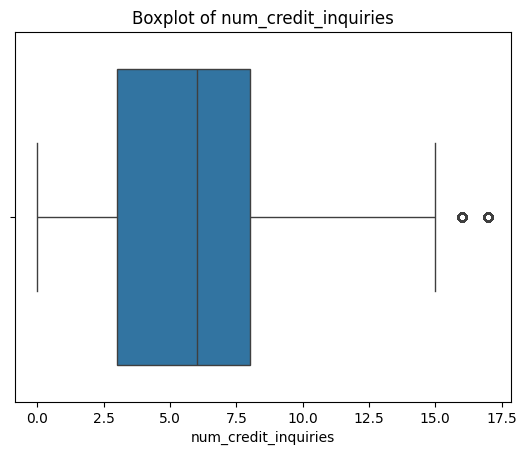

In [246]:
q1 = train_df_new['num_credit_inquiries'].quantile(0.25)
q3 = train_df_new['num_credit_inquiries'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(upper_bound)
num_credit_inquiries_outliers = train_df_new[train_df_new['num_credit_inquiries'] > upper_bound]['num_credit_inquiries'].count()
print(f'Number of Outliers in num_credit_inquiries: {num_credit_inquiries_outliers}')
train_df_new.loc[train_df_new['num_credit_inquiries'] > upper_bound, 'num_credit_inquiries'] = train_df_new.groupby('customer_id')['num_credit_inquiries'].transform(lambda x: x.mode()[0])
sns.boxplot(x=train_df_new['num_credit_inquiries'])
plt.title(f'Boxplot of num_credit_inquiries')


152791.05
Number of Outliers in annual_income: 2783


Text(0.5, 1.0, 'Boxplot of annual_income')

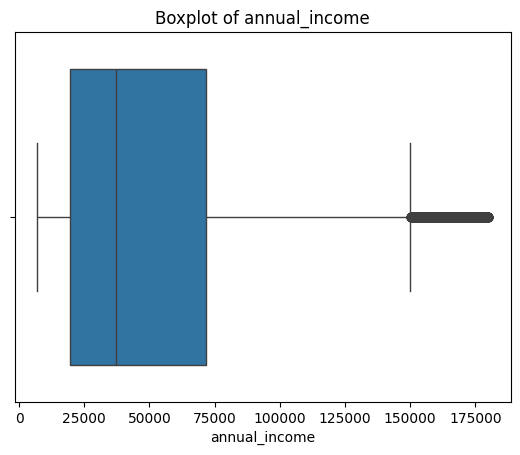

In [247]:
q1 = train_df_new['annual_income'].quantile(0.25)
q3 = train_df_new['annual_income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(upper_bound)
annual_income_outliers = train_df_new[train_df_new['annual_income'] > upper_bound]['annual_income'].count()
print(f'Number of Outliers in annual_income: {annual_income_outliers}')
train_df_new.loc[train_df_new['annual_income'] > upper_bound, 'annual_income'] = train_df_new.groupby('customer_id')['annual_income'].transform(lambda x: x.mode()[0])
sns.boxplot(x=train_df_new['annual_income'])
plt.title(f'Boxplot of annual_income')

In [248]:
q1 = train_df_new['total_emi_per_month'].quantile(0.25)
q3 = train_df_new['total_emi_per_month'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Calculate median of NON-outliers only
non_outlier_median = train_df_new[
    (train_df_new['total_emi_per_month'] >= lower_bound) & 
    (train_df_new['total_emi_per_month'] <= upper_bound)
]['total_emi_per_month'].median()

# Replace outliers with clean median
train_df_new.loc[train_df_new['total_emi_per_month'] > upper_bound, 'total_emi_per_month'] = non_outlier_median

In [249]:
train_df_new[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.00000,33.30924,10.76500,14.00000,24.00000,33.00000,42.00000,56.00000
num_bank_accounts,100000.00000,5.62936,2.32731,-1.00000,4.00000,6.00000,7.00000,10.00000
num_credit_card,100000.00000,5.53368,2.06713,0.00000,4.00000,5.00000,7.00000,11.00000
interest_rate,100000.00000,14.53208,8.74133,1.00000,7.00000,13.00000,20.00000,34.00000
num_of_loan,100000.00000,3.98920,2.09223,1.00000,2.00000,4.00000,5.00000,9.00000
delay_from_due_date,100000.00000,21.06878,14.86010,-5.00000,10.00000,18.00000,28.00000,67.00000
num_of_delayed_payment,100000.00000,13.31760,6.18897,-1.50000,9.00000,14.00000,18.00000,26.50000
num_credit_inquiries,100000.00000,6.17944,3.49869,0.00000,3.00000,6.00000,8.00000,17.00000
credit_history_age,100000.00000,221.20688,99.68111,1.00000,144.00000,219.00000,302.00000,404.00000
credit_utilization_ratio,100000.00000,32.28517,5.11688,20.00000,28.05257,32.30578,36.49666,50.00000


In [256]:
train_df_new['month']

0         january
1        february
2           march
3           april
4             may
           ...   
99995       april
99996         may
99997        june
99998        july
99999      august
Name: month, Length: 100000, dtype: object

In [ ]:
x = pd.to_datetime(train_df_new.month, format='%B').dt.month
x

0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: month, Length: 100000, dtype: int32

In [259]:
x.head(12)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     1
9     2
10    3
11    4
Name: month, dtype: int32